In [1]:
import geopandas as gpd

In [2]:
file_path = '.'

In [3]:
shp_file1 = gpd.read_file(file_path + 'sfca-den.shp')
shp_file2 = gpd.read_file(file_path + 'sfca-65.shp')
shp_file3 = gpd.read_file(file_path + 'sfca-covid.shp')

In [4]:
data1 = shp_file1['2sfca']
data2 = shp_file2['2sfca']
data3 = shp_file3['sfca_nor']

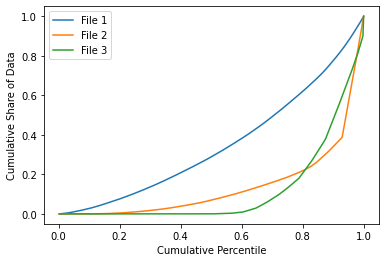

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_curve(data):
    data = np.sort(data)
    n = len(data)
    cumulative_percentiles = np.arange(1, n + 1) / n
    cumulative_values = np.cumsum(data) / np.sum(data)
    return cumulative_percentiles, cumulative_values

x1, y1 = lorenz_curve(data1)
x2, y2 = lorenz_curve(data2)
x3, y3 = lorenz_curve(data3)

plt.plot(x1, y1, label='File 1')
plt.plot(x2, y2, label='File 2')
plt.plot(x3, y3, label='File 3')
plt.xlabel('Cumulative Percentile')
plt.ylabel('Cumulative Share of Data')
plt.legend()
plt.show()

In [6]:
def gini_coefficient(data):
    lorenz_x, lorenz_y = lorenz_curve(data)
    area_under_lorenz = np.trapz(lorenz_y, lorenz_x)
    gini = 1 - 2 * area_under_lorenz
    return gini

gini1 = gini_coefficient(data1)
gini2 = gini_coefficient(data2)
gini3 = gini_coefficient(data3)

print(f'Gini Coefficient for File 1: {gini1}')
print(f'Gini Coefficient for File 2: {gini2}')
print(f'Gini Coefficient for File 3: {gini3}')

Gini Coefficient for File 1: 0.3036960305774934
Gini Coefficient for File 2: 0.7262631833856004
Gini Coefficient for File 3: 0.763825587014406
